In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('Nashville Housing.csv')
df

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df=df.drop(["ParcelID","LandUse","PropertyAddress","SaleDate","LegalReference","OwnerName","OwnerAddress","TaxDistrict"], axis=1)
df

,UniqueID,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,240000,No,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,366000,No,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,435000,No,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,255000,No,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,278000,No,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,157500,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,145000,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,234611,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,93844,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df["SoldAsVacant"] = df["SoldAsVacant"].map(
    {"No": "0","Yes": "1","N": "0", "Y": "1"},
    #na_action=None,
)

In [34]:
df['SoldAsVacant'] = df['SoldAsVacant'].astype(int) # convierto la columna SoldAsVacant en entero

In [35]:
df["SoldAsVacant"].value_counts()

SoldAsVacant
0    51802
1     4675
Name: count, dtype: int64

In [36]:
#df['SalePrice'] = df['SalePrice'].apply(lambda x: x.replace(',','.'))

In [37]:
df['SalePrice'] = df['SalePrice'].str.replace('$','') #reemplazo el caracter $ por un espacio vacio
#df["SalePrice"] = df["SalePrice"].apply(lambda x: x.replace('$',''))

In [38]:
#df['SalePrice'] = df['SalePrice'].apply(lambda x: x.replace(',','.'))

In [39]:
df['SalePrice'] = df['SalePrice'].str.strip() #elimino los espacios en blanco al pricipio y al final de cada valor

In [40]:
#df['SalePrice'] = df['SalePrice'].astype(float)
df['SalePrice'] = df['SalePrice'].str.replace(',', '', regex=False).astype(float) #reemplaza la , por espacio en blanco y convierte
# la columna SalePrice en flotante

In [41]:
df=df.fillna(df.median()) #completo los valores NA con la mediana
df

,UniqueID,SalePrice,SoldAsVacant,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,240000.0,0,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,366000.0,0,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,435000.0,0,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,255000.0,0,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,278000.0,0,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,157500.0,0,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56473,27707,145000.0,0,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56474,52709,234611.0,1,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56475,54042,93844.0,1,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0


In [42]:
#Separamos en X e y
X = df.drop(["SoldAsVacant"], axis=1)
y = df["SoldAsVacant"]

In [43]:
X

,UniqueID,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,240000.0,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,366000.0,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,435000.0,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,255000.0,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,278000.0,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
56472,30469,157500.0,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56473,27707,145000.0,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56474,52709,234611.0,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0
56475,54042,93844.0,0.27,28800.0,111400.0,148500.0,1960.0,3.0,2.0,0.0


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#Separamos en train y test!
X_train, X_test,y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)

In [46]:
#Creamos un arbol de decisión sencillo y lo fiteamos
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
y_test_pred = clf.predict(X_test)

In [48]:
accuracy_score(y_test,y_test_pred)

0.953552880075543

In [49]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(16944,))

In [50]:
y_test

36178    0
26077    0
40217    0
54881    0
25822    1
        ..
5021     1
1991     0
15885    0
21408    0
10805    0
Name: SoldAsVacant, Length: 16944, dtype: int64

In [51]:
# Classification Report:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     15541
           1       0.71      0.75      0.73      1403

    accuracy                           0.95     16944
   macro avg       0.84      0.86      0.85     16944
weighted avg       0.96      0.95      0.95     16944



In [52]:
print("Feature Selecction:")

for i, feature in enumerate(range(X.shape[1])):
  print(f"feature {feature}: {clf.feature_importances_[i]: .2f}")

Feature Selecction:
feature 0:  0.43
feature 1:  0.36
feature 2:  0.03
feature 3:  0.02
feature 4:  0.03
feature 5:  0.05
feature 6:  0.03
feature 7:  0.00
feature 8:  0.05
feature 9:  0.00


In [53]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat

array([[15101,   440],
       [  347,  1056]])

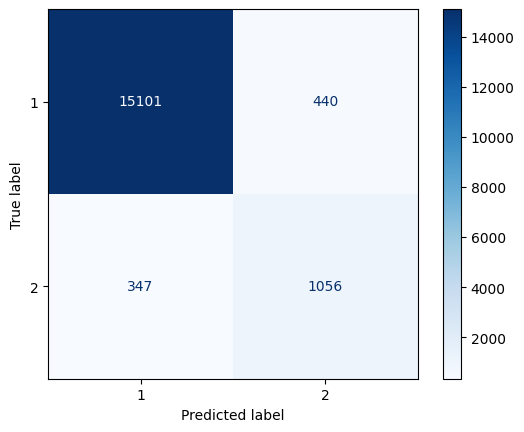

In [54]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2])
disp.plot(cmap=plt.cm.Blues)

RAMDON FOREST CLASSIFICATION 

In [68]:
#Creamos un random forest
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")

In [69]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [70]:
y_pred = model.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred) #Hubo una mejora pequeña en comparación con el arbol de decisión hecho anteriormente

0.9641170915958451

In [72]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15541
           1       0.82      0.73      0.77      1403

    accuracy                           0.96     16944
   macro avg       0.90      0.86      0.88     16944
weighted avg       0.96      0.96      0.96     16944



In [73]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[15316,   225],
       [  383,  1020]])

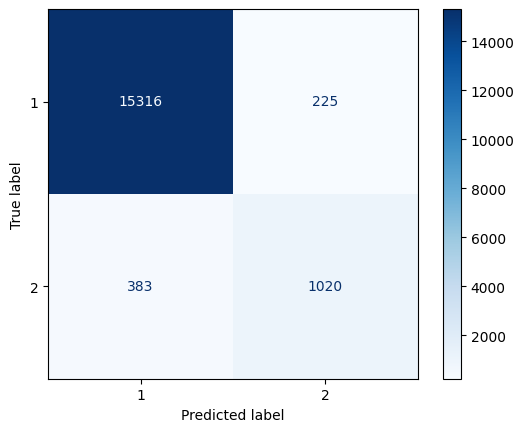

In [74]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2])
disp.plot(cmap=plt.cm.Blues)

In [75]:
print("Feature Selecction:")

for i, feature in enumerate(range(X.shape[1])):
  print(f"feature {feature}: {model.feature_importances_[i]: .2f}")

Feature Selecction:
feature 0:  0.29
feature 1:  0.40
feature 2:  0.02
feature 3:  0.03
feature 4:  0.07
feature 5:  0.05
feature 6:  0.11
feature 7:  0.01
feature 8:  0.02
feature 9:  0.00


MODELO SVC

In [76]:
# Creamos un modelo SVC
modelo = SVC(C=0.1,kernel='rbf',random_state=42)

In [77]:
modelo.fit(X_train,y_train)

SVC(C=0.1, random_state=42)

In [78]:
y_pred = modelo.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred) # Podemos ver que hubo una disminución de eficiencia en comparación con los 2 modelos anteriores

0.9171978281397545

In [80]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15541
           1       0.00      0.00      0.00      1403

    accuracy                           0.92     16944
   macro avg       0.46      0.50      0.48     16944
weighted avg       0.84      0.92      0.88     16944



In [81]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[15541,     0],
       [ 1403,     0]])

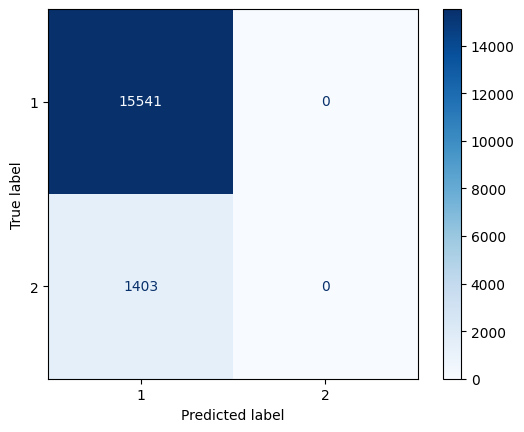

In [82]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2])
disp.plot(cmap=plt.cm.Blues)

MODELO REGRESIÓN LOGICA

In [83]:
# Creamos un modelo de LR
model_lr = LogisticRegression()

In [84]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred = model_lr.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred)  # Hubo una disminición demasiado pequeña en comparación con el modelo SVC

0.9166076487252125

In [87]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15541
           1       0.08      0.00      0.00      1403

    accuracy                           0.92     16944
   macro avg       0.50      0.50      0.48     16944
weighted avg       0.85      0.92      0.88     16944



In [88]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[15530,    11],
       [ 1402,     1]])

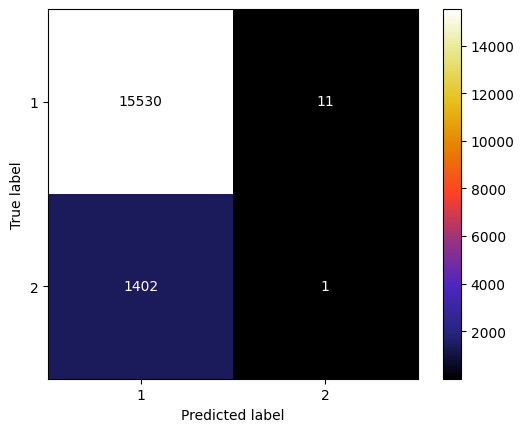

In [89]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2])
disp.plot(cmap=plt.cm.CMRmap)

MODELO KNN

In [90]:
# Creamos el modelo KNN
modelo = KNeighborsClassifier()

In [91]:
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
y_pred = modelo.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred) # Hubo un pequeño aumento de eficiencia en comparación con el modelo LR y el modelo SVC,pero
#se encuentra por debajo de los modelos de Ramdon forest y arbol de decición

0.9394475920679887

In [94]:
# Classification Report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15541
           1       0.65      0.59      0.62      1403

    accuracy                           0.94     16944
   macro avg       0.81      0.78      0.79     16944
weighted avg       0.94      0.94      0.94     16944



In [95]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[15089,   452],
       [  574,   829]])

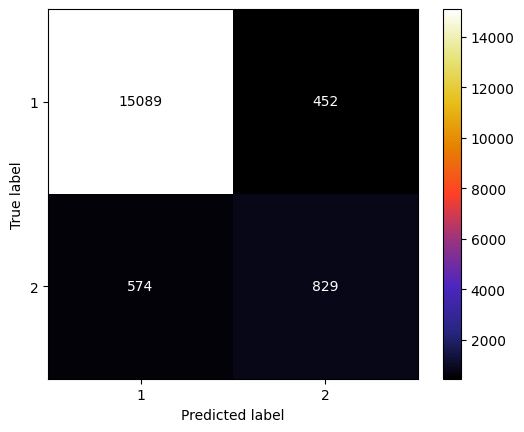

In [96]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[1,2])
disp.plot(cmap=plt.cm.CMRmap)